In [124]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import shapiro, kstest, stats, norm

from sklearn import metrics

# Data preprocessing

In [2]:
dat_wat_or = pd.read_csv("water.csv")
dat_wat_or.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
dat_wat = pd.read_csv("water.csv")
dat_wat.columns = ["V"+str(i) for i in range(1, len(dat_wat.columns)+1)]  # rename column names to be similar to R naming convention
X = dat_wat.loc[:, "V2":]  # independent variables data
y = dat_wat.V1  # dependednt variable data
dat_wat.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
# pd.summary(dat_wat)
dat_wat.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
dat_wat = dat_wat.dropna(axis=0)
dat_wat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      2011 non-null   float64
 1   V2      2011 non-null   float64
 2   V3      2011 non-null   float64
 3   V4      2011 non-null   float64
 4   V5      2011 non-null   float64
 5   V6      2011 non-null   float64
 6   V7      2011 non-null   float64
 7   V8      2011 non-null   float64
 8   V9      2011 non-null   float64
 9   V10     2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


# Visualizing the data

In [6]:
# dat_wat = pd.read_csv("water.csv")
# dat_wat.columns = ["V"+str(i) for i in range(1, len(dat_wat.columns)+1)]  # rename column names to be similar to R naming convention
# X = dat_wat.loc[:, "V2":]  # independent variables data
# y = dat_wat.V1  # dependednt variable data
# dat_wat.head(10)

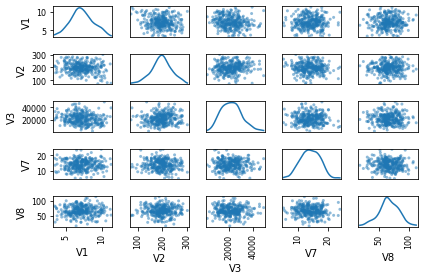

In [7]:
# let's have a look at the data:
pd.plotting.scatter_matrix(dat_wat.loc[:500, ['V1', 'V2', 'V3', 'V7', 'V8']], diagonal="kde")
plt.tight_layout()
plt.show()

# Step 1

You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

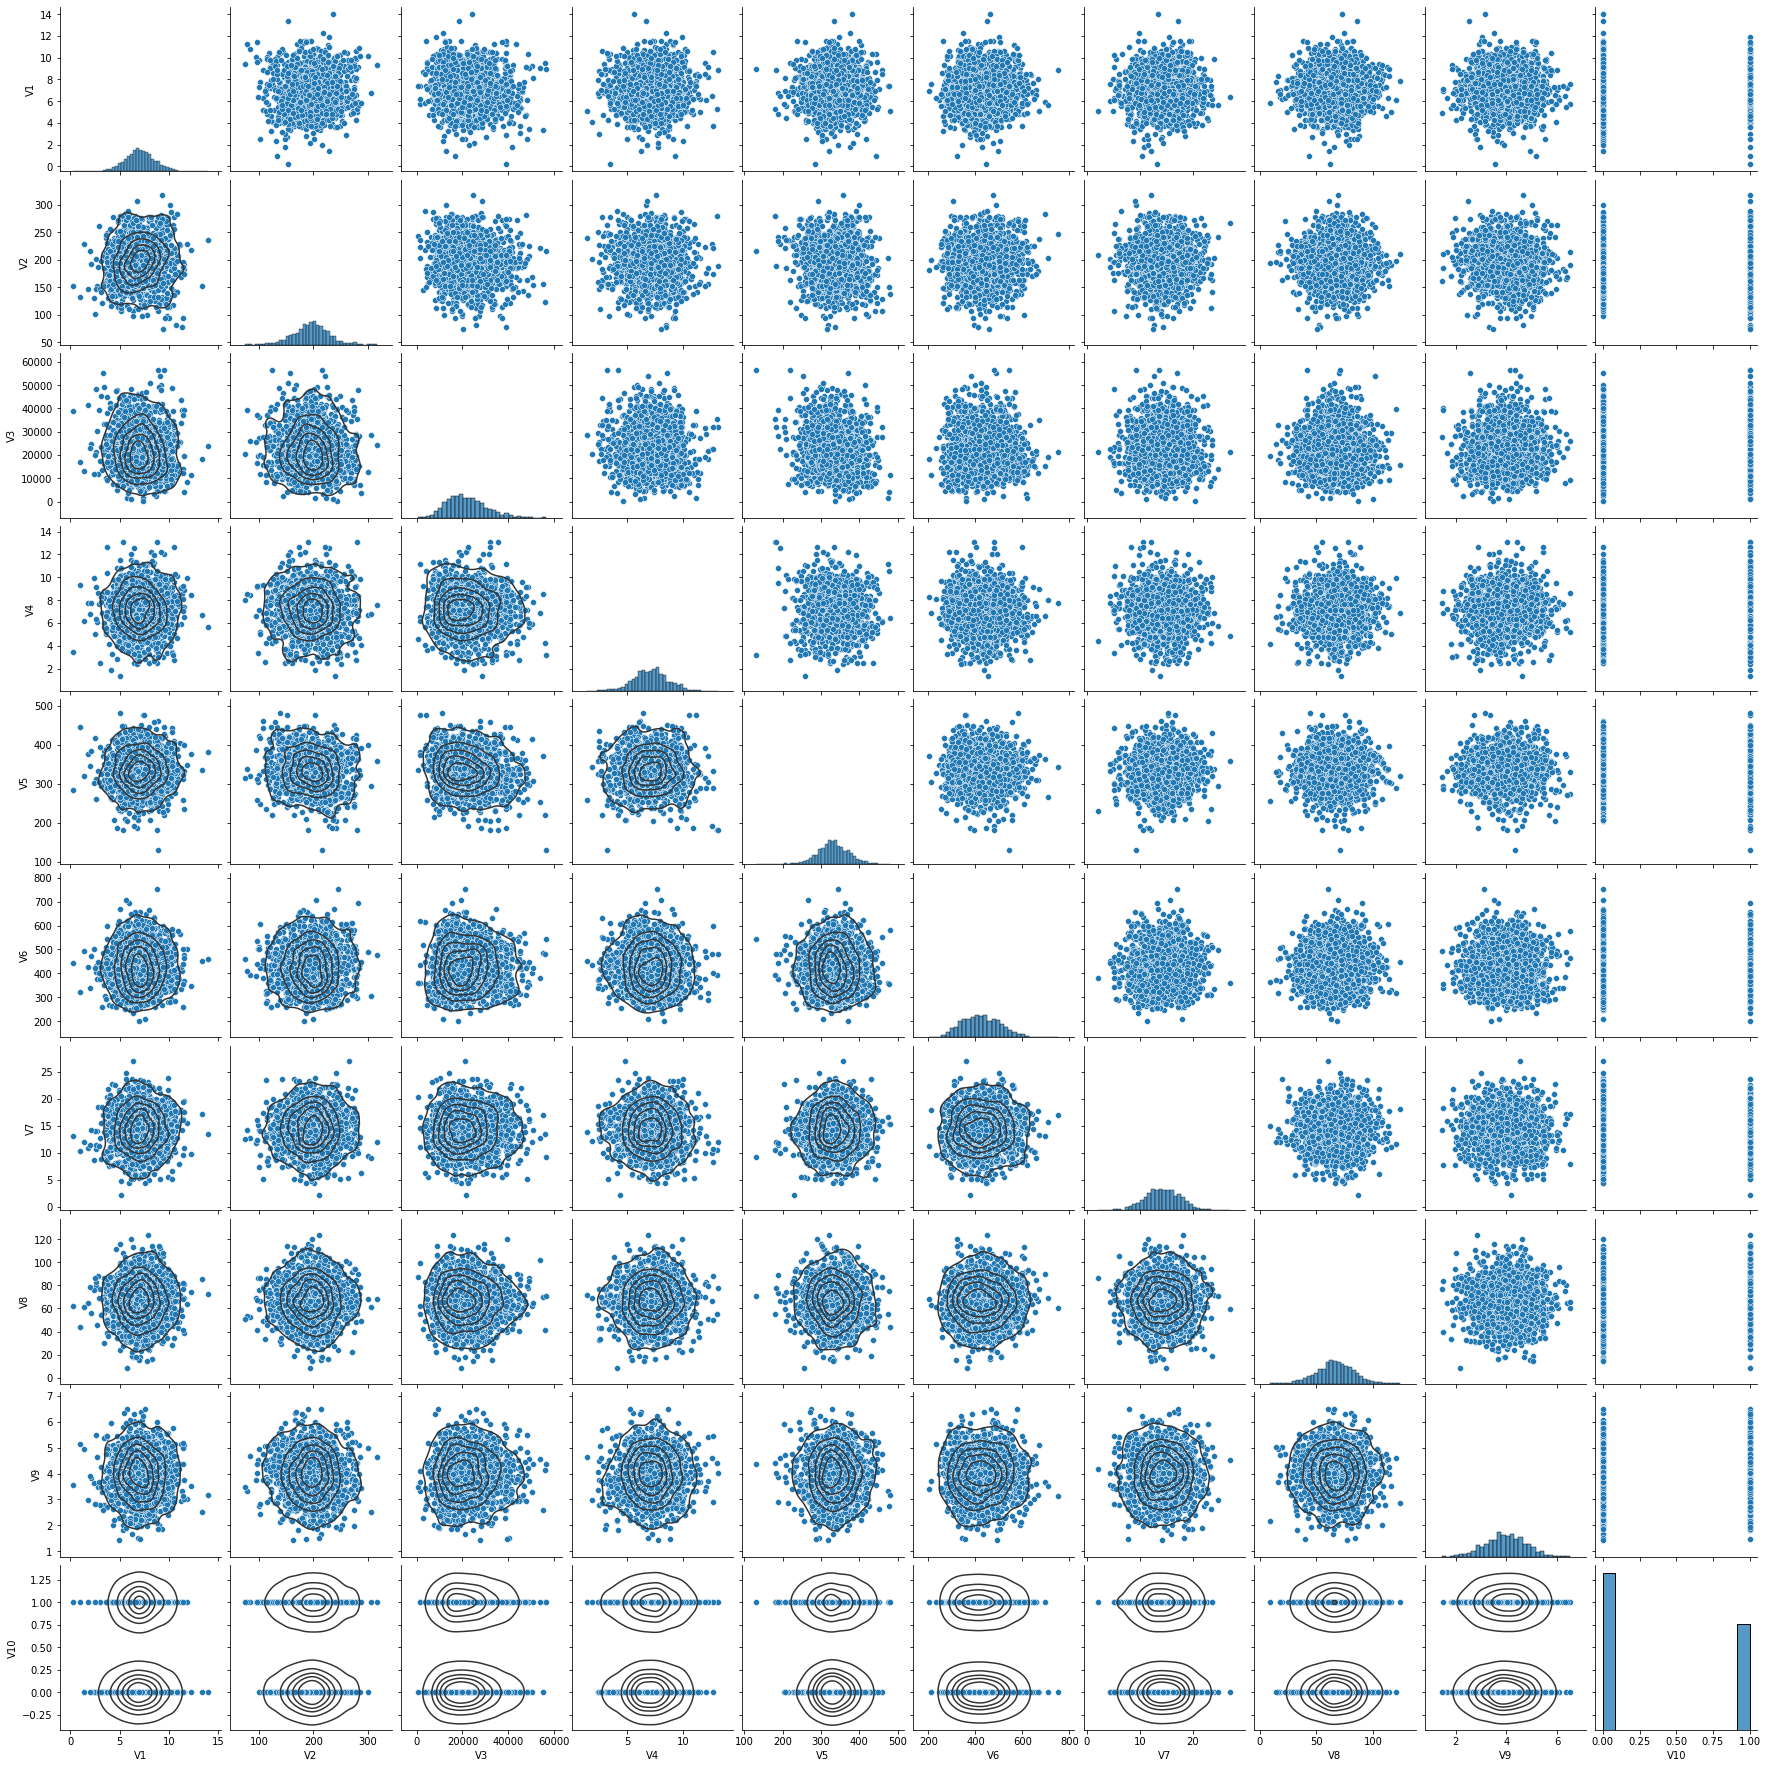

In [8]:
g = sns.pairplot(dat_wat)
g.map_lower(sns.kdeplot, levels=6, color=".2")

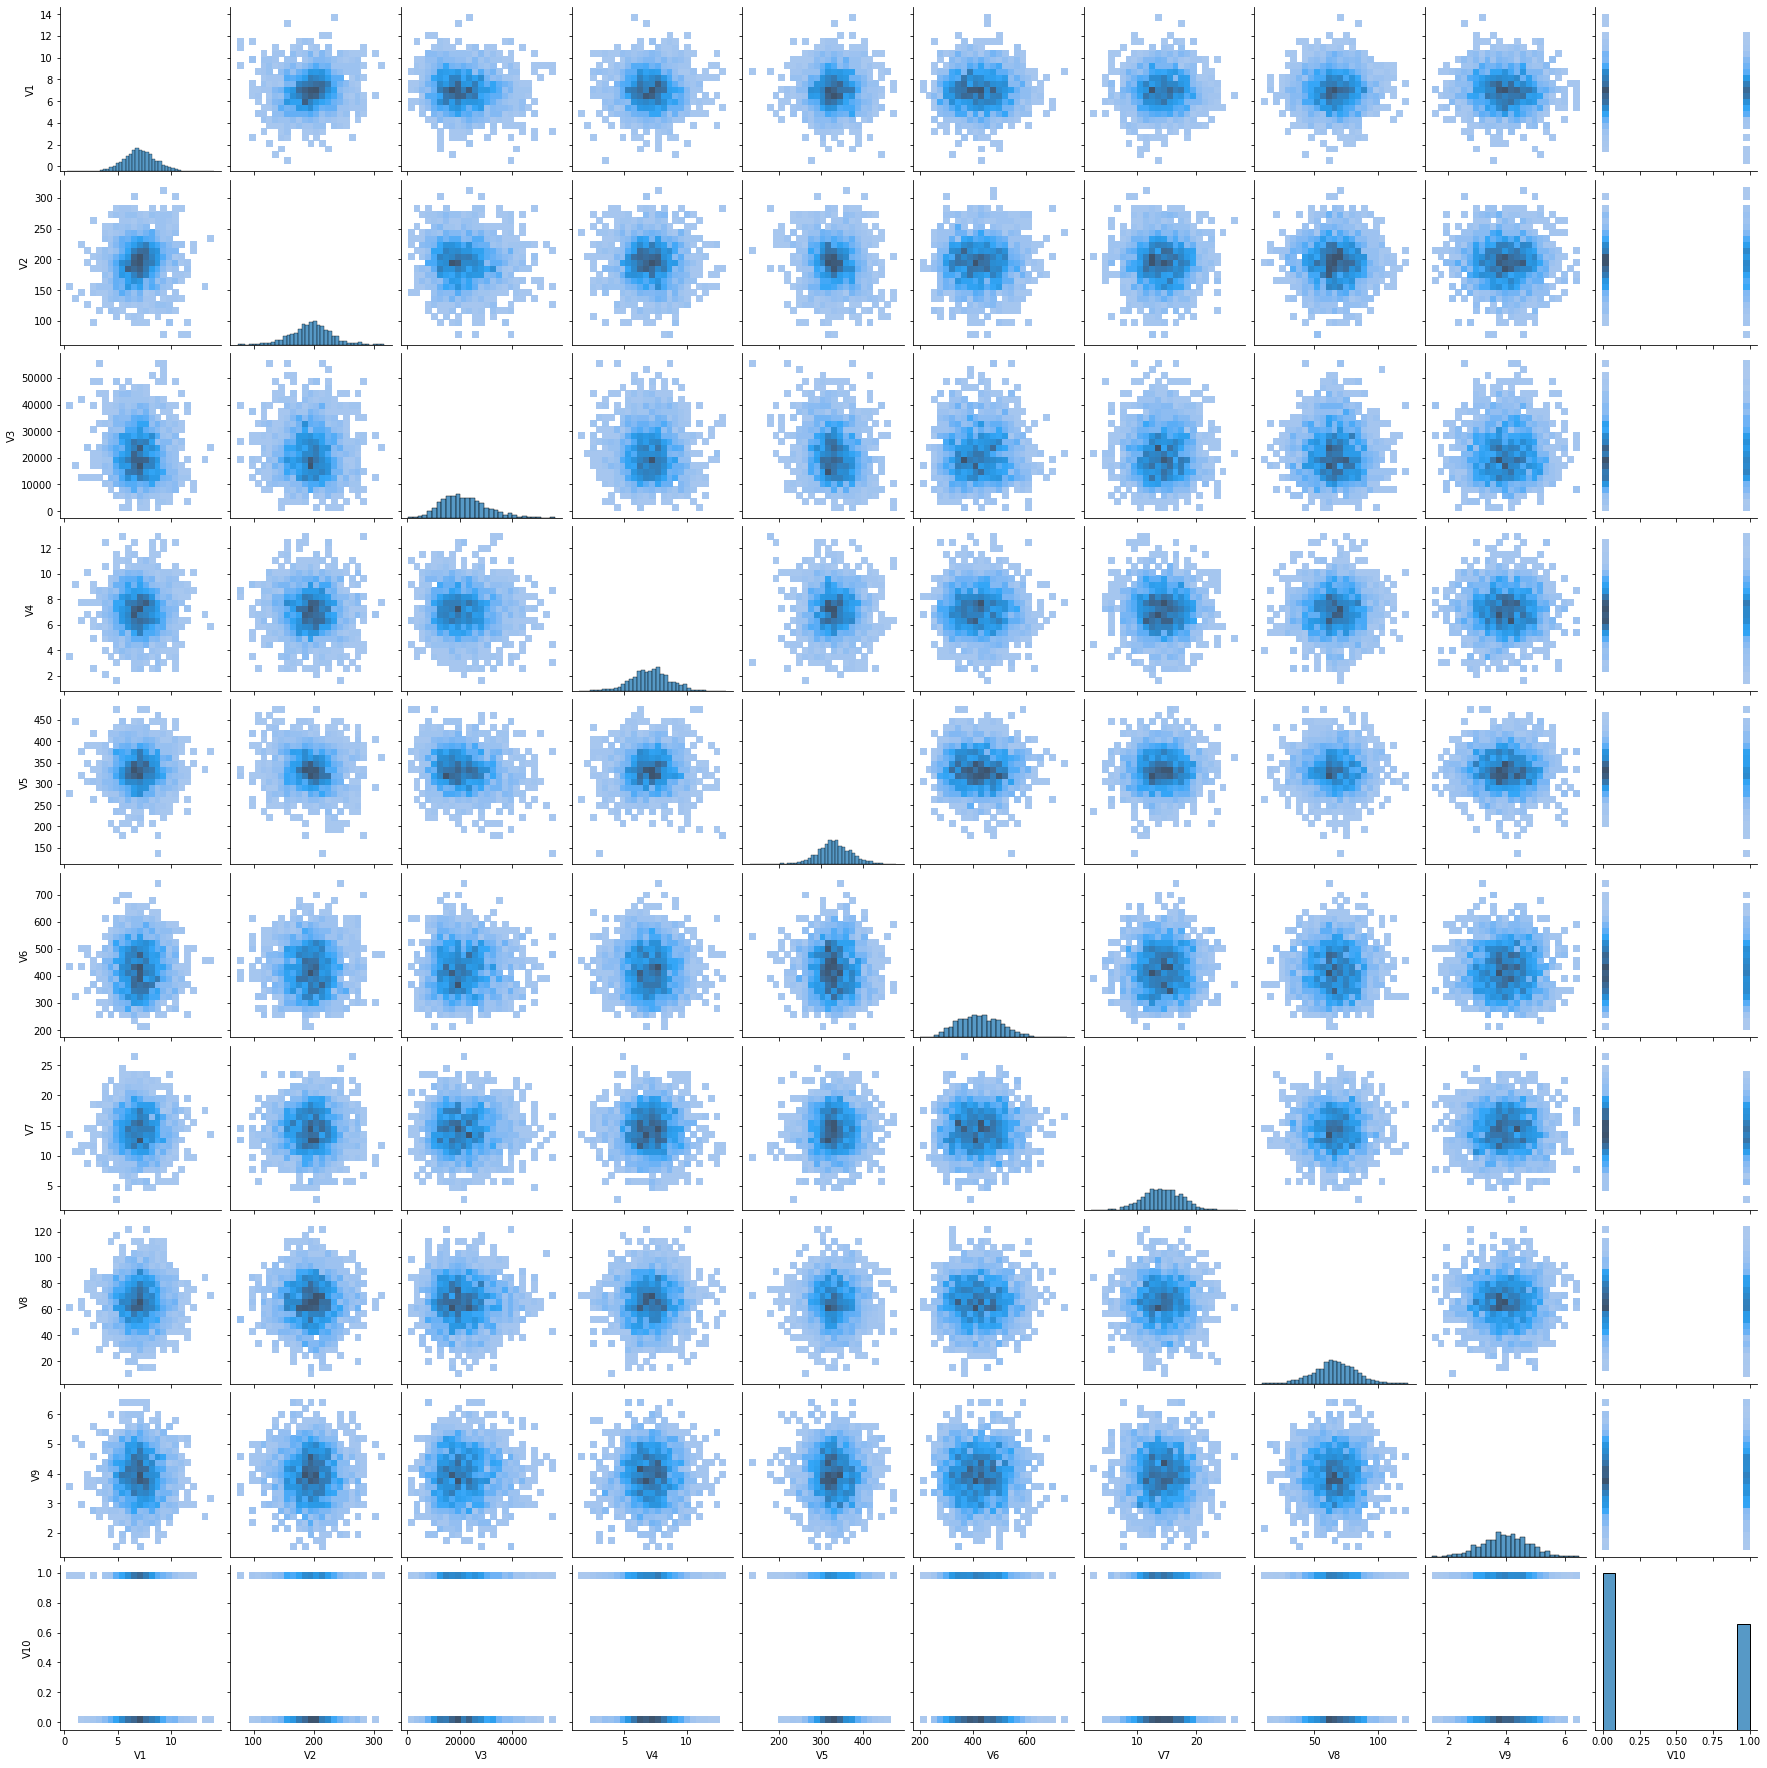

In [9]:
sns.pairplot(dat_wat, kind='hist', plot_kws={'bins': 25})

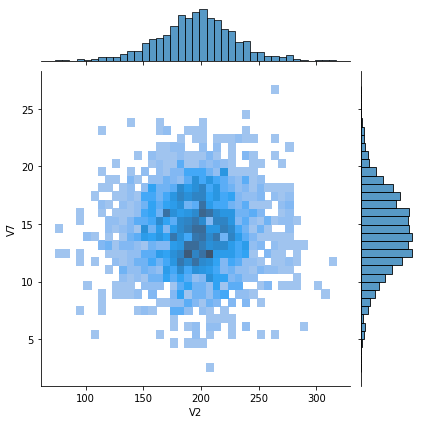

In [10]:
# 1. continuous random variables:

g = sns.jointplot(data=dat_wat, x='V2', y='V7', kind="hist",
                  ratio=5)
plt.show()

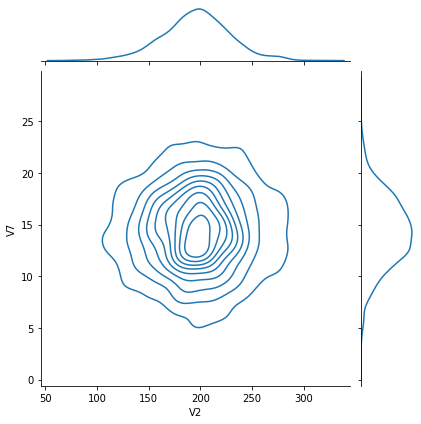

In [11]:
g = sns.jointplot(data=dat_wat, x='V2', y='V7', kind="kde",
                  ratio=5)
plt.show()

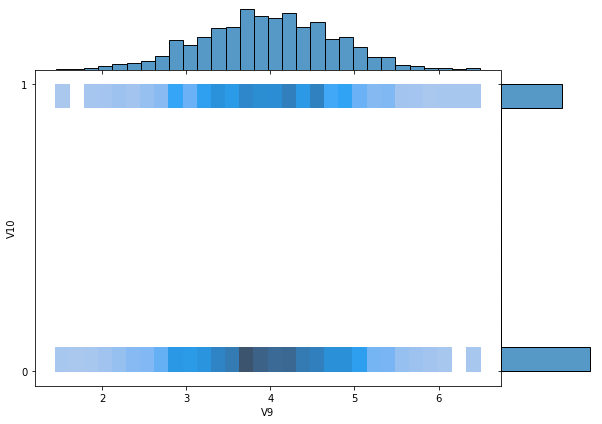

In [12]:
# 2. discrete random variables (one continuous and one discrete)
g = sns.jointplot(data=dat_wat, x='V9', y='V10', kind="hist",
                  ratio=5, space=0)
plt.yticks([0.0, 1.0])
g.fig.set_figwidth(9)
g.fig.set_figheight(6)

plt.show()

# Step 2

You need to make an estimation of multivariate mathematical expectation and variance.

In [13]:
dat_wat.apply(np.mean)

V1         7.085990
V2       195.968072
V3     21917.441374
V4         7.134338
V5       333.224672
V6       426.526409
V7        14.357709
V8        66.400859
V9         3.969729
V10        0.403282
dtype: float64

In [14]:
dat_wat.apply(np.std)

V1        1.572945
V2       32.626969
V3     8640.090806
V4        1.584426
V5       41.194926
V6       80.692502
V7        3.324132
V8       16.073112
V9        0.780152
V10       0.490556
dtype: float64

In [15]:
dat_wat.var(axis=0)

V1     2.475388e+00
V2     1.065049e+03
V3     7.468831e+07
V4     2.511654e+00
V5     1.697866e+03
V6     6.514519e+03
V7     1.105535e+01
V8     2.584734e+02
V9     6.089401e-01
V10    2.407653e-01
dtype: float64

# Step 3

You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

In [16]:
# Feature V10 is binary (discrete), let's get a subset of the dataset, where V10 is equal to 1

water_type1 = dat_wat[dat_wat['V10']==1]
water_type1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0
mean,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254,1.0
std,1.437623,35.301146,8891.547966,1.732796,47.446190,81.950982,3.257917,16.297713,0.776408,0.0
min,0.227499,73.492234,1198.943699,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.256039,174.380497,15816.076607,6.106169,301.768819,360.275012,12.148355,55.751069,3.440564,1.0
50%,7.046549,197.617494,21217.158596,7.212254,331.087177,421.099917,14.252684,66.612984,4.007347,1.0
75%,7.955161,218.414531,27696.134419,8.181431,365.632984,482.296528,16.561121,77.372587,4.527463,1.0
max,11.898078,317.338124,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [17]:
water_type1.drop('V10', 1, inplace=True)

<ipython-input-17-2ed8710891b8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  water_type1.drop('V10', 1, inplace=True)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
water_type1.apply(np.mean)

V1        7.113791
V2      195.908341
V3    22344.922883
V4        7.174395
V5      332.457832
V6      425.005423
V7       14.294764
V8       66.581596
V9        3.991254
dtype: float64

In [19]:
water_type1.apply(np.std)

V1       1.436736
V2      35.279376
V3    8886.064433
V4       1.731727
V5      47.416929
V6      81.900442
V7       3.255908
V8      16.287662
V9       0.775929
dtype: float64

In [20]:
water_type1.var()

V1    2.066759e+00
V2    1.246171e+03
V3    7.905963e+07
V4    3.002580e+00
V5    2.251141e+03
V6    6.715963e+03
V7    1.061403e+01
V8    2.656154e+02
V9    6.028091e-01
dtype: float64

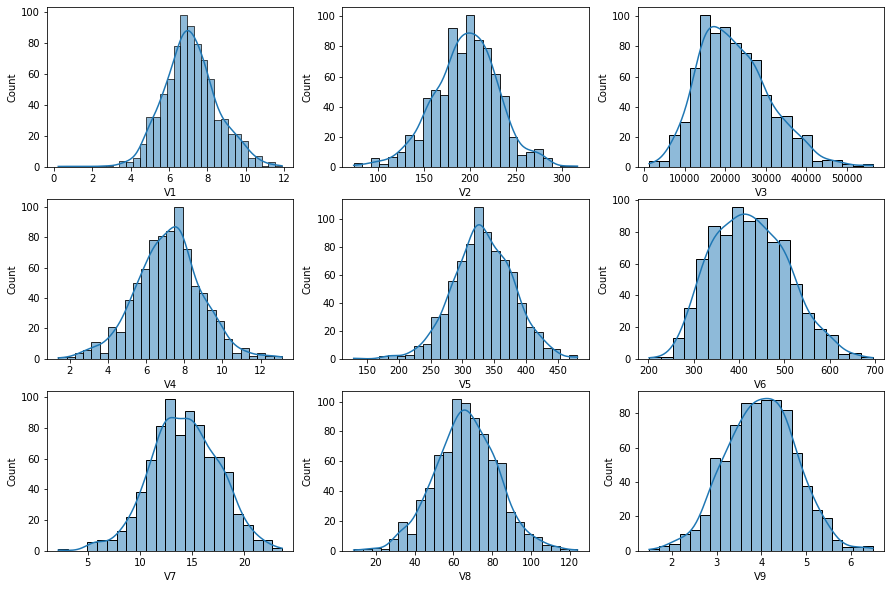

In [21]:
_, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, name in enumerate(water_type1.columns[:]):
    row, col = i // 3, i % 3
    sns.histplot(data=water_type1, x=name, ax=axs[row, col], kde=True)

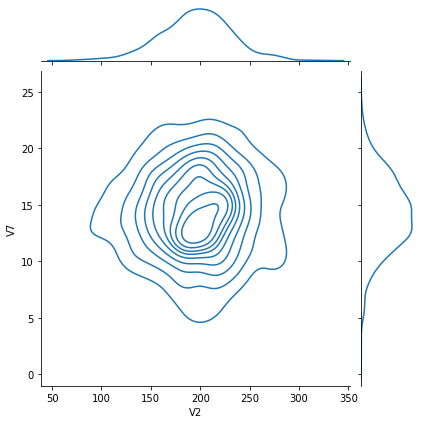

In [22]:
g = sns.jointplot(data=water_type1, x='V2', y='V7', kind="kde",
                  ratio=5)
plt.show()

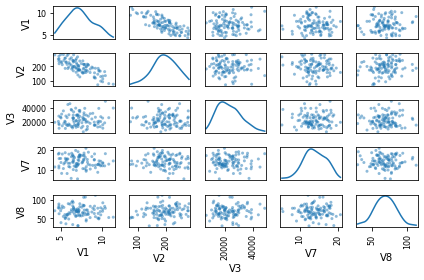

In [23]:
# let's have an overall look at the distributions:
pd.plotting.scatter_matrix(water_type1.loc[:500, ['V1', 'V2', 'V3', 'V7', 'V8']], diagonal="kde")
plt.tight_layout()
plt.show()

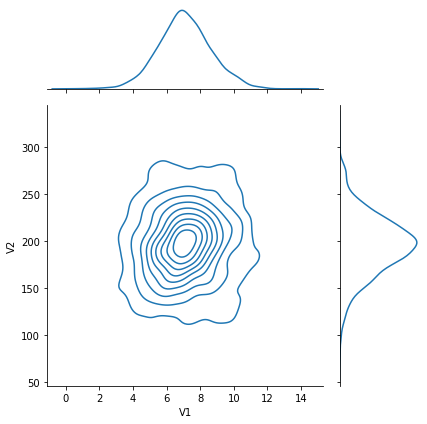

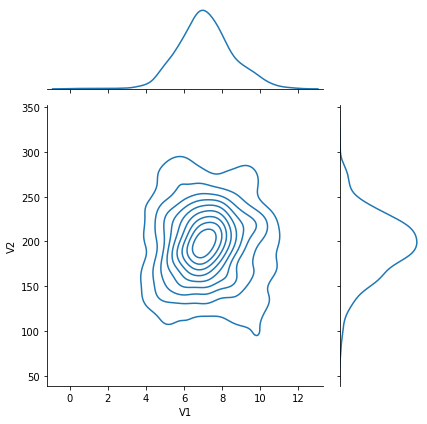

In [24]:
# We can see that the trend of V1-V2 relationship changed greatly compared to the main dataset,
# let's have a closer look at their relation and compare it with the one in the main dataset:

g1 = sns.jointplot(data=dat_wat, x='V1', y='V2', kind="kde",
                  ratio=3)
g2 = sns.jointplot(data=water_type1, x='V1', y='V2', kind="kde",
                  ratio=3)
plt.show()

# Step 4

You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [25]:
# Let's estimate pair coefficient of correlation for V5 and V3
V5_m = np.mean(dat_wat.V5)
V3_m = np.mean(dat_wat.V3)

In [26]:
difV5 = dat_wat.V5-V5_m
difV3 = dat_wat.V3-V3_m

In [27]:
rV5V3 = np.sum(difV5*difV3) / np.sqrt(np.sum(difV5**2)*np.sum(difV3**2))

rV5V3

-0.16276920425470223

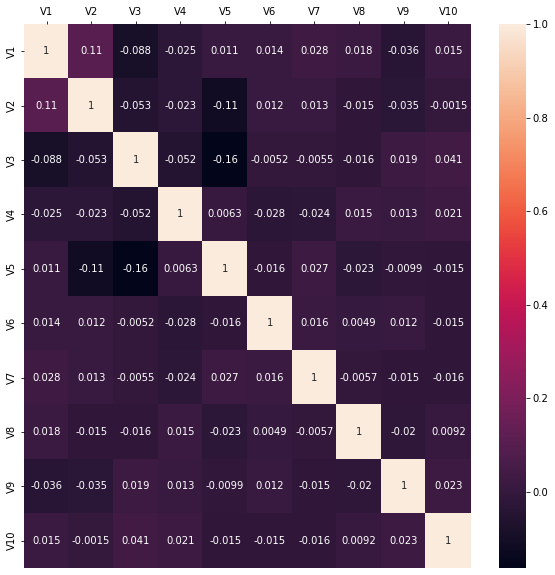

In [28]:
# correlation for all pairs:
corrmat = dat_wat.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrmat, vmax=1., square=False, annot=True).xaxis.tick_top()

In [29]:
print(stats.pearsonr(dat_wat.V5,dat_wat.V3)) # Pearson
# we get the same results as in the correlation matrix and absolutely the same as 
# when we used the estimation formula for pair coefficient of correlation calculation
# also p-value << 0.05 => the correlation is statistically significant

'''A p-value is the probability that the null hypothesis is true. 
In our case, it represents the probability that the correlation between x and y in the sample data occurred by chance. 
A p-value of 0.05 means that there is only 5% chance that results from your sample occurred due to chance. 

0-hyposesis: ρ = 0 
alternative: ρ != 0 

If the P-value is smaller than the significance level (α = 0.05), 
we reject the null hypothesis in favor of the alternative. We conclude that the correlation is statistically significant. 
or in simple words “ we conclude that there is a linear relationship between x and y in the population at the α level ”
'''

(-0.1627692042547022, 2.077119092817017e-13)


'A p-value is the probability that the null hypothesis is true. \nIn our case, it represents the probability that the correlation between x and y in the sample data occurred by chance. \nA p-value of 0.05 means that there is only 5% chance that results from your sample occurred due to chance. \n\n0-hyposesis: ρ = 0 \nalternative: ρ != 0 \n\nIf the P-value is smaller than the significance level (α = 0.05), \nwe reject the null hypothesis in favor of the alternative. We conclude that the correlation is statistically significant. \nor in simple words “ we conclude that there is a linear relationship between x and y in the population at the α level ”\n'

In [30]:
pair_names = []
names1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
names2 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
for i in range(len(names1)):
  for j in range(len(names2)):
    pair_names.append([names1[i], names2[j], 0.0])

In [31]:
pair1 = pair_names[0]
pair1

['V1', 'V1', 0.0]

In [32]:
stats.pearsonr(dat_wat[pair1[0]],dat_wat[pair1[1]])

(1.0, 0.0)

In [33]:
np.round(0.1089481, 4)

0.1089

In [34]:
# pair_names1 = []
# names4 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
# names3 = ['V10']
# for i in range(len(names4)):
#   pair_names1.append([names3[0], names4[i], 0.0])

In [35]:
# for pair in pair_names1:
#   pair[2] = np.round(stats.spearmanr(dat_wat[pair[0]],dat_wat[pair[1]])[1], 4)
#   print(f'{pair[0]}, {pair[1]}: {stats.spearmanr(dat_wat[pair[0]],dat_wat[pair[1]])}')

In [36]:
for pair in pair_names:
  pair[2] = np.round(stats.pearsonr(dat_wat[pair[0]],dat_wat[pair[1]])[1], 4)
  print(f'{pair[0]}, {pair[1]}: {stats.pearsonr(dat_wat[pair[0]],dat_wat[pair[1]])}')

V1, V1: (1.0, 0.0)
V1, V2: (0.10894811307433669, 9.719512568444406e-07)
V1, V3: (-0.08761499297413197, 8.349287115444713e-05)
V1, V4: (-0.02476849123322378, 0.26691188191478626)
V1, V5: (0.010524348025839942, 0.6371585557286984)
V1, V6: (0.014127848409221745, 0.5266099776645405)
V1, V7: (0.028375218953606163, 0.20339862985742244)
V1, V8: (0.01827787581919664, 0.4126637256368232)
V1, V9: (-0.03584899387367286, 0.10802463445990432)
V1, V10: (0.014530037037528112, 0.5149065707818627)
V2, V1: (0.10894811307433669, 9.719512568444406e-07)
V2, V2: (1.0, 0.0)
V2, V3: (-0.053268884798701954, 0.01689383612879433)
V2, V4: (-0.02268497513754873, 0.30925461780336444)
V2, V5: (-0.10852061796367428, 1.0721940040141164e-06)
V2, V6: (0.011730547690303439, 0.5990704363156537)
V2, V7: (0.013223861421817055, 0.5534017864821246)
V2, V8: (-0.015400382094615212, 0.4900502161450665)
V2, V9: (-0.034830941793598795, 0.11841349823718623)
V2, V10: (-0.0015050204316191282, 0.9462238843640244)
V3, V1: (-0.087614992

In [37]:
int(pair1[0][1:])

1

In [38]:
matrix = np.zeros(shape=(10, 10))
for pair in pair_names:
  matrix[int(pair[0][1:])-1, int(pair[1][1:])-1] = pair[2]
matrix

array([[0.000e+00, 0.000e+00, 1.000e-04, 2.669e-01, 6.372e-01, 5.266e-01,
        2.034e-01, 4.127e-01, 1.080e-01, 5.149e-01],
       [0.000e+00, 0.000e+00, 1.690e-02, 3.093e-01, 0.000e+00, 5.991e-01,
        5.534e-01, 4.901e-01, 1.184e-01, 9.462e-01],
       [1.000e-04, 1.690e-02, 0.000e+00, 2.020e-02, 0.000e+00, 8.158e-01,
        8.059e-01, 4.825e-01, 3.843e-01, 6.820e-02],
       [2.669e-01, 3.093e-01, 2.020e-02, 0.000e+00, 7.793e-01, 2.050e-01,
        2.859e-01, 5.017e-01, 5.560e-01, 3.516e-01],
       [6.372e-01, 0.000e+00, 0.000e+00, 7.793e-01, 0.000e+00, 4.680e-01,
        2.301e-01, 2.953e-01, 6.562e-01, 4.928e-01],
       [5.266e-01, 5.991e-01, 8.158e-01, 2.050e-01, 4.680e-01, 0.000e+00,
        4.831e-01, 8.266e-01, 5.755e-01, 4.874e-01],
       [2.034e-01, 5.534e-01, 8.059e-01, 2.859e-01, 2.301e-01, 4.831e-01,
        0.000e+00, 7.995e-01, 4.893e-01, 4.854e-01],
       [4.127e-01, 4.901e-01, 4.825e-01, 5.017e-01, 2.953e-01, 8.266e-01,
        7.995e-01, 0.000e+00, 3.582e-

In [39]:
df_p_value = pd.DataFrame(data=matrix, columns=names1)

In [40]:
df_p_value

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0.0000,0.0000,0.0001,0.2669,0.6372,0.5266,0.2034,0.4127,0.1080,0.5149
1,0.0000,0.0000,0.0169,0.3093,0.0000,0.5991,0.5534,0.4901,0.1184,0.9462
2,0.0001,0.0169,0.0000,0.0202,0.0000,0.8158,0.8059,0.4825,0.3843,0.0682
3,0.2669,0.3093,0.0202,0.0000,0.7793,0.2050,0.2859,0.5017,0.5560,0.3516
4,0.6372,0.0000,0.0000,0.7793,0.0000,0.4680,0.2301,0.2953,0.6562,0.4928
5,0.5266,0.5991,0.8158,0.2050,0.4680,0.0000,0.4831,0.8266,0.5755,0.4874
6,0.2034,0.5534,0.8059,0.2859,0.2301,0.4831,0.0000,0.7995,0.4893,0.4854
7,0.4127,0.4901,0.4825,0.5017,0.2953,0.8266,0.7995,0.0000,0.3582,0.6787
8,0.1080,0.1184,0.3843,0.5560,0.6562,0.5755,0.4893,0.3582,0.0000,0.3093
9,0.5149,0.9462,0.0682,0.3516,0.4928,0.4874,0.4854,0.6787,0.3093,0.0000


In [41]:
# Example with high p-value:
print(stats.pearsonr(dat_wat.V5,dat_wat.V4)) 

(0.006254057456839653, 0.7792577775838295)


In [42]:
dat_wat.V5.size

2011

In [43]:
# Confidence interval for the correlation coefficient

def calc_corr_conf_inter(v1: str, v2: str):
  r, p = stats.pearsonr(dat_wat[v1],dat_wat[v2])
  r_z = np.arctanh(r) # Fisher transformation
  ''' The Fisher Z-Transformation is a way to transform the sampling distribution of 
  Pearsons r (i.e. the correlation coefficient) so that it becomes normally distributed.
  When the sample correlation coefficient r is near 1 or -1, 
  its distribution is highly skewed (asymmetry of the probability distribution about its mean), 
  which makes it difficult to estimate confidence intervals.
  The Fisher transformation solves this problem by yielding a variable 
  whose distribution is approximately normally distributed, with a variance that is stable over different values of r.
  '''
  

  # Corresponding standard deviation
  se = 1/np.sqrt(dat_wat.V4.size-3) 
  alpha = 0.05
  z = norm.ppf(1-alpha/2)

  # Corr. coeff. and confidence interval
  lo_z, hi_z = r_z-z*se, r_z+z*se

  print('Correlation coefficient = ', r)
  print('Confidence interval for the correlation coefficient ', lo_z, hi_z)

  ''' A confidence interval for a correlation coefficient is a range of values 
  that is likely to contain a population correlation coefficient with a certain level of confidence. '''

In [44]:
calc_corr_conf_inter('V1', 'V2')

Correlation coefficient =  0.10894811307433669
Confidence interval for the correlation coefficient  0.06564353257565994 0.1531210062917957


In [45]:
calc_corr_conf_inter('V2', 'V5')

Correlation coefficient =  -0.10852061796367428
Confidence interval for the correlation coefficient  -0.1526883963567792 -0.06521092264064343


In [46]:
# calc_corr_conf_inter('V5', 'V6')

In [47]:
calc_corr_conf_inter('V5', 'V3')

Correlation coefficient =  -0.1627692042547022
Confidence interval for the correlation coefficient  -0.2079686919050719 -0.12049121818893616


# Step 5

Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

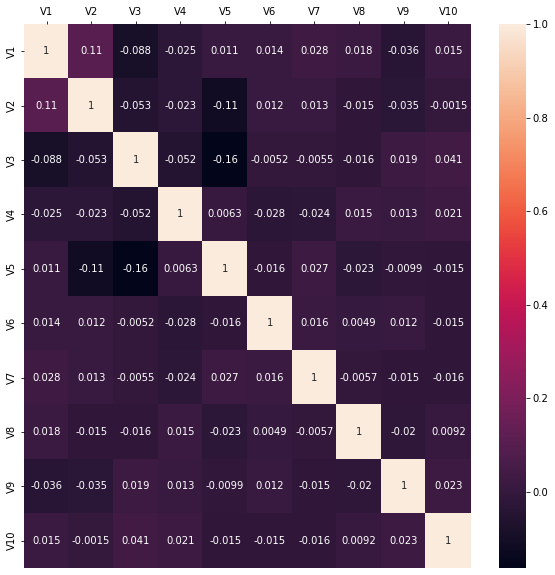

In [48]:
# multivariate correlation for ALL variables
corrmat = dat_wat.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrmat, vmax=1., square=False, annot=True).xaxis.tick_top()

In [49]:
features = dat_wat.drop('V3', 1) #axis=1
y = dat_wat['V3']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=1)

<ipython-input-49-e917a8a6326f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = dat_wat.drop('V3', 1) #axis=1


In [50]:
features.head()

,V1,V2,V4,V5,V6,V7,V8,V9,V10
3,8.316766,214.373394,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


# Step 6.1

Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [51]:
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [52]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  6725.2389189102
Mean squared error =  71169469.6615913


In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  51.816154427913574


In [54]:
'''The model can't predict well => try another model'''
# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-5.28914259e+02 -1.59820527e+01 -4.43003764e+02 -3.22964866e+01
 -9.72234896e-01  2.25862347e+01 -2.29270937e+00 -4.09087619e+01
  1.25126623e+03]


In [55]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Mean absolute error with lasso =  6725.2131948101305
Mean squared error with lasso =  71168901.65938598
Mean absolute error with aic lasso =  6721.137197485269


# Step 6.2

In [69]:
def rmse(y_test, y_pred):
  return np.sqrt(((y_pred - y_test) ** 2).mean())

def print_metrics(title, y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  # print()
  print(f'Metrics of {title}')
  print('Mean absolute error:', mae)
  print('Mean squared error:', mse)
  print(f'RMSE: {rmse(y_test, y_pred)}')
  print(f'R^2: {metrics.r2_score(y_test, y_pred)}')
  print()


In [57]:
'''Multicollinearity exists whenever an independent variable is highly correlated 
with one or more of the other independent variables in a multiple regression equation. 
Multicollinearity is a problem because it undermines the statistical significance of an independent variable

Multicollinearity in this task can be analysed by means of correlation matrix - we can see that the highest coefficients is
V1-V2, V5-V2, V5-V3 relations, that's why let has V5 as a target variable and V2, V3 as its main features'''


features = dat_wat.drop('V5', 1) #axis=1
features = features.drop(['V10', 'V8'], 1)
y = dat_wat['V5']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=1)

<ipython-input-57-4eed4eee7582>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = dat_wat.drop('V5', 1) #axis=1
<ipython-input-57-4eed4eee7582>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = features.drop(['V10', 'V8'], 1)


In [58]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [64]:
print_metrics('linear regression', y_test, y_pred)

Metrics of linear regression
Mean absolute error: 31.225559313620895
Mean squared error: 1604.9808298320304
RMSE: 40.062211993748306
R^2: 0.043561885654312515


In [ ]:
features.head()

,V1,V2,V3,V4,V6,V7,V9
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708
6,10.223862,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989
7,8.635849,203.361523,13672.091764,4.563009,474.607645,12.363817,4.401425


In [ ]:
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

In [66]:
'''The error is still high, may be regularization will be of help'''

# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.26011834 -0.14755051 -0.00073412  0.45072125 -0.01247947  0.23426443
 -0.6885391 ]


In [67]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)

y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)

print_metrics('lasso regression', y_test, y_pred_lasso)
print_metrics('aic lasso regression', y_test, y_pred_lasso_aic)


Metrics of lasso regression
Mean absolute error: 31.223030938316942
Mean squared error: 1604.176586820883
RMSE: 40.052173309583125
R^2: 0.04404114911638035


Metrics of aic lasso regression
Mean absolute error: 31.166651373484832
Mean squared error: 1604.9281047171753
RMSE: 40.06155394785848
R^2: 0.043593305537026006



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [68]:
model_ridge = linear_model.Ridge(alpha=5)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

print_metrics('ridge regression', y_test, y_pred_ridge)


Metrics of ridge regression
Mean absolute error: 31.22557886656343
Mean squared error: 1604.964805270809
RMSE: 40.06201199728752
R^2: 0.04357143499025051



In [70]:
'''Regularization didn't give any results, probably because linear correlation between target and features is weak,
that's why the next and the last step will be polynomial regression'''
d = 3

poly = PolynomialFeatures(d)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(d)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)

X_new = poly.fit_transform(features)
y_pred_poly_all = reg.predict(X_new)

print_metrics('regression with polynomial features', y_test, y_pred_poly)

Metrics of regression with polynomial features
Mean absolute error: 31.477549643139657
Mean squared error: 1560.74869813326
RMSE: 39.5063121302566
R^2: 0.06992064075538729



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


# Step 6.3: PCA+Regression

In [107]:
X = dat_wat.drop('V5', 1) #axis=1
X = X.drop(['V10', 'V8'], 1)
# X = X.drop(['V8'], 1)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)
pca = PCA(n_components=6)
X1 = pca.fit_transform(X1) 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1, y, test_size=0.33, random_state=1)

<ipython-input-107-fc31e75357a3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dat_wat.drop('V5', 1) #axis=1
<ipython-input-107-fc31e75357a3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['V10', 'V8'], 1)


In [109]:
models = [
    LinearRegression(),
    linear_model.Lasso(alpha=0.1), 
    linear_model.Ridge(alpha=5), 
]
for model in models:
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    print_metrics(model, y_test_pca, y_pred_pca)

Metrics of LinearRegression()
Mean absolute error: 31.225725128193833
Mean squared error: 1605.5274606834735
RMSE: 40.069033687917575
R^2: 0.04323613809952587

Metrics of Lasso(alpha=0.1)
Mean absolute error: 31.232932606758176
Mean squared error: 1606.382271102417
RMSE: 40.07969898966829
R^2: 0.04272674057276349

Metrics of Ridge(alpha=5)
Mean absolute error: 31.2255655260509
Mean squared error: 1605.6003973871877
RMSE: 40.06994381562305
R^2: 0.04319267375274338



In [110]:
d = 3

poly = PolynomialFeatures(d)
X_train_new_pca = poly.fit_transform(X_train_pca)

poly = PolynomialFeatures(d)
X_test_new_pca = poly.fit_transform(X_test_pca)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new_pca, y_train_pca)
y_pred_poly_pca = reg.predict(X_test_new_pca)

X_new_pca = poly.fit_transform(X1)
y_pred_poly_all_pca = reg.predict(X_new_pca)

print_metrics('regression with polynomial features', y_test_pca, y_pred_poly_pca)

Metrics of regression with polynomial features
Mean absolute error: 31.07845114739068
Mean squared error: 1547.9113784262115
RMSE: 39.343504907750805
R^2: 0.07757063982431511



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


# Step 6.4: Visualization

Text(0, 0.5, 'Sulfate rate')

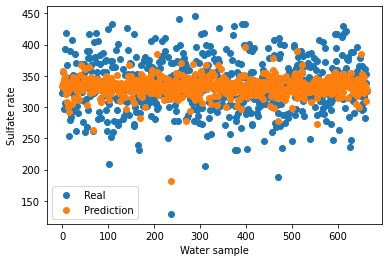

In [114]:
x = []
# Visualization of real and predicted values
for i in range(len(y_test)):
    x.append(i)

plt.scatter(x, y_test, label = u'Real')
plt.scatter(x, y_pred_poly_pca, label = u'Prediction')
plt.legend()
plt.xlabel('Water sample')
plt.ylabel('Sulfate rate')

Text(0, 0.5, 'Sulfate rate')

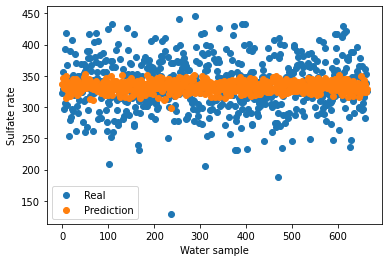

In [113]:
plt.scatter(x, y_test, label = u'Real')
plt.scatter(x, y_pred, label = u'Prediction')
plt.legend()
plt.xlabel('Water sample')
plt.ylabel('Sulfate rate')

In [ ]:
'''Polynomial regression though have higher MAE gives lower MSE and higher R^2 and it also looks to be a
vizually better choice compared to linear regression'''

'Polynomial regression though have higher MAE gives lower MSE and it also looks to be a\nvizually better choice compared to linear regression'

# Step 7

Analyze the quality of regression model (distribution of residuals determination coefficient).

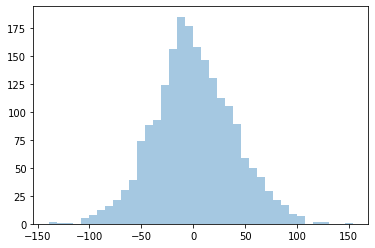

In [116]:
'''For the chosen dataset regression can not give a good result, but among models
the best one was polynomial+pca'''

# Plotting the distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_poly_all_pca)
residual = y1 - y2
sns.distplot(residual, kde=False)

In [120]:
print(f'Shapiro-Wilk test: {shapiro(residual)}')
'''since the p-value is less than 0.05, we reject the null-hyposesis => 
  the residuals are not normally distributed'''

Shapiro-Wilk test ShapiroResult(statistic=0.9981181621551514, pvalue=0.01992371864616871)


In [125]:
kstest(residual, norm.cdf) # Kolmogorov-Smirnov test
''' the p-value is lower than our threshold of 0.05, 
  so we reject the null hypothesis in favor of the default “two-sided” alternative:
  the data are not distributed according to the standard normal.'''

KstestResult(statistic=0.4810390838759878, pvalue=0.0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


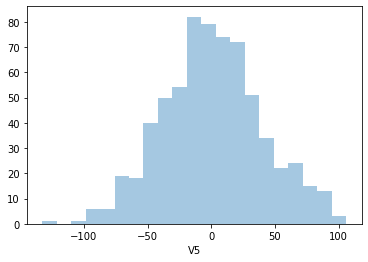

In [129]:
'''For the chosen dataset regression can not give a good result, but among models
the best one was polynomial+pca'''

residuals = y_test_pca - y_pred_poly_pca
sns.distplot(residuals, kde=False)

In [131]:
print(shapiro(residuals))
kstest(residuals, norm.cdf)

ShapiroResult(statistic=0.9967487454414368, pvalue=0.19987820088863373)


KstestResult(statistic=0.4681845792321748, pvalue=5.910379367620543e-134)

In [127]:
# Metrics of the model:
print_metrics('regression with polynomial features', y_test_pca, y_pred_poly_pca)

'''Determination coefficient or r-squared value (R^2 notation) represents the proportion of variation in y
 (about its mean) explained by the multiple linear regression model with specified predictors'''

Metrics of regression with polynomial features
Mean absolute error: 31.07845114739068
Mean squared error: 1547.9113784262115
RMSE: 39.343504907750805
R^2: 0.07757063982431511

